In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

In [2]:
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
from sisepuede.manager.sisepuede_file_structure import SISEPUEDEFileStructure
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf


# Use os.getcwd() instead of os.path.dirname(__file__) in a Jupyter notebook
sys.path.append(os.path.join('../', 'utils'))

from TransformationUtils import ExcelYAMLHandler
from TransformationUtils import StrategyCSVHandler


In [3]:
##  SETUP DIRECTORIES

dir_cur = pathlib.Path(os.getcwd())
dir_data = dir_cur.joinpath("data")
dir_transformations = dir_cur.joinpath("transformations")


##  SETUP FILES

fp_data_base = dir_data.joinpath("sisepuede_inputs_georgia.csv")


##  SETUP SOME SISEPUEDE STUFF

file_struct = SISEPUEDEFileStructure()

matt = file_struct.model_attributes
regions = sc.Regions(matt)
time_periods = sc.TimePeriods(matt)

In [4]:
##  BUILD BASE INPUTS

df_inputs_raw = pd.read_csv(fp_data_base)

# pull example data to fill in gaps
examples = SISEPUEDEExamples()
df_inputs_example = examples.input_data_frame

In [5]:
df_inputs_raw.head()

,region,iso_code3,period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,georgia,GEO,0,6970000,70,2923,31.751466,6468,315,508,...,14.251229,27.557750,0.921311,0.813395,0,3.30693,3.306930,39.202663,16.072745,15.929195
1,georgia,GEO,1,6970000,70,2923,31.751466,6468,315,508,...,12.808034,27.557750,0.918334,0.816150,0,3.30693,3.306930,47.312358,15.460559,15.108558
2,georgia,GEO,2,6970000,70,2923,31.751466,6468,315,508,...,12.624132,27.610771,0.916130,0.821111,0,3.30693,3.307371,50.557338,15.350089,15.005724
3,georgia,GEO,3,6970000,70,2923,31.751466,6468,315,508,...,13.037755,33.069300,0.918555,0.816922,0,3.30693,3.790844,52.388716,16.958543,14.721163
4,georgia,GEO,4,6970000,70,2923,31.751466,6468,315,508,...,10.743510,27.557750,0.917673,0.818024,0,3.30693,4.158464,50.068133,13.796953,13.766562


In [6]:
df_inputs_example.head()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08


In [7]:
def compare_dfs(df1, df2):
    # Assuming your DataFrames are df1 and df2
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Columns present in df1 but not in df2
    diff_in_df1 = columns_df1 - columns_df2

    # Columns present in df2 but not in df1
    diff_in_df2 = columns_df2 - columns_df1

    print("Columns in df1 but not in df2:", diff_in_df1)
    print("Columns in df2 but not in df1:", diff_in_df2)

def add_missing_cols(df1, df2):
    # Identify columns in df1 but not in df2
    columns_to_add = [col for col in df1.columns if col not in df2.columns]

    # Add missing columns to df2 with their values from df1
    for col in columns_to_add:
        df2[col] = df1[col]
    
    return df2


In [8]:
compare_dfs(df_inputs_example, df_inputs_raw)


Columns in df1 but not in df2: {'ratio_agrc_below_ground_to_above_ground_biomass_rice', 'nemomod_entc_emissions_activity_ratio_fuel_production_fp_natural_gas_tonne_ch4_per_tj', 'ef_soil_ef4_n_volatilisation_n2o_wet_climate', 'ef_trns_mobile_combustion_water_borne_kg_n2o_per_tj_ammonia', 'energydensity_gravimetric_enfu_gj_per_tonne_fuel_coke', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_coke', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_kerosene', 'energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia', 'ratio_agrc_above_ground_residue_to_yield_cereals', 'nemomod_entc_emissions_activity_ratio_fuel_production_fp_petroleum_refinement_tonne_n2o_per_tj', 'ef_enfu_stationary_combustion_tonne_ch4_per_tj_fuel_coal_deposits', 'ef_soil_ef3_pasture_n2o_wet_climate', 'regressionb_agrc_above_ground_residue_cereals_kg_per_ha', 'ef_enfu_stationary_combustion_tonne_n2o_per_tj_fuel_hydrogen', 'ef_enfu_combustion_tonne_co2_per_tj_fuel_crude', 'regressionb_agrc_above_ground_residue_pulses_kg_pe

In [9]:
df_inputs_raw = df_inputs_raw.rename(columns={'period':'time_period'})
df_inputs_raw_complete = add_missing_cols(df_inputs_example, df_inputs_raw.copy())
df_inputs_raw_complete = df_inputs_raw_complete.drop(columns='iso_code3')
df_inputs_raw_complete.head()

,region,time_period,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_electrolysis_water,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_electricity,energydensity_gravimetric_enfu_gj_per_tonne_fuel_ammonia,energydensity_gravimetric_enfu_gj_per_tonne_fuel_water,frac_trns_fuelmix_water_borne_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_ammonia_production_ammonia,nemomod_entc_output_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_hydrogen,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation_ccs,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_natural_gas,nemomod_entc_input_activity_ratio_fuel_production_fp_hydrogen_reformation_ccs_oil
0,georgia,0,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
1,georgia,1,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
2,georgia,2,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
3,georgia,3,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0
4,georgia,4,6970000,70,2923,31.751466,6468,315,508,303,...,0.000004,0,18.6,0.00005,0.0,1,1,0.0,1.315,0.0


In [10]:
compare_dfs(df_inputs_example, df_inputs_raw_complete)

Columns in df1 but not in df2: set()
Columns in df2 but not in df1: set()


In [11]:
# Get a list of columns with NaN values
# Get a list of columns with NaN values
columns_with_na = df_inputs_raw_complete.columns[df_inputs_raw_complete.isna().any()].tolist()

print(columns_with_na)


[]


In [12]:
simulation = 0.11618306654485
edgar_value = 0.0074053450

# factor
factor = edgar_value / simulation
factor

0.06373859134748629

In [13]:
vars = [
'ef_fgtv_distribution_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_flaring_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_production_fugitive_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_production_venting_tonne_co2_per_m3_fuel_coal',
'ef_fgtv_production_venting_tonne_co2_per_m3_fuel_oil',
'ef_fgtv_transmission_tonne_co2_per_m3_fuel_natural_gas',
'ef_fgtv_transmission_tonne_co2_per_m3_fuel_oil']

In [14]:
df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor


In [15]:
# fgtv_sector ch4
simulation = 0.98411017786700
edgar_value = 0.0935904790

# factor
factor = edgar_value / simulation
factor

vars = [
"ef_fgtv_distribution_tonne_ch4_per_m3_fuel_natural_gas",       
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_production_flaring_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_production_fugitive_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_production_venting_tonne_ch4_per_m3_fuel_coal",
"ef_fgtv_production_venting_tonne_ch4_per_m3_fuel_oil",
"ef_fgtv_transmission_tonne_ch4_per_m3_fuel_natural_gas",
"ef_fgtv_transmission_tonne_ch4_per_m3_fuel_oil"]

df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor

In [16]:
# frst_sector ch4

# factor
simulation = -0.98411017786700
edgar_value = -5.4843000000

factor = edgar_value / simulation
factor

vars = [
"ef_frst_forestfires_mangroves_co2",        
"ef_frst_forestfires_primary_co2",          
"ef_frst_forestfires_secondary_co2",        
"ef_frst_sequestration_mangroves_kt_co2_ha",
"ef_frst_sequestration_primary_kt_co2_ha",  
"ef_frst_sequestration_secondary_kt_co2_ha",]

df_inputs_raw_complete[vars] = df_inputs_raw_complete[vars] * factor

In [17]:
ippu_init = ['prodinit_ippu_cement_tonne',
             'prodinit_ippu_chemicals_tonne',
             'prodinit_ippu_electronics_tonne',
             'prodinit_ippu_glass_tonne',
             'prodinit_ippu_lime_and_carbonite_tonne',
             'prodinit_ippu_metals_tonne',
             'prodinit_ippu_mining_tonne',
             'prodinit_ippu_paper_tonne',
             'prodinit_ippu_plastic_tonne',
             'prodinit_ippu_rubber_and_leather_tonne',
             'prodinit_ippu_wood_tonne',
             'prodinit_ippu_recycled_textiles_tonne']

In [18]:
df_inputs_raw_complete[ippu_init].iloc[0]

prodinit_ippu_cement_tonne                1.241355e+06
prodinit_ippu_chemicals_tonne             7.054237e+04
prodinit_ippu_electronics_tonne           3.166171e+04
prodinit_ippu_glass_tonne                 8.940670e+03
prodinit_ippu_lime_and_carbonite_tonne    2.008550e+03
prodinit_ippu_metals_tonne                3.832396e+05
prodinit_ippu_mining_tonne                1.012641e+07
prodinit_ippu_paper_tonne                 8.782538e+04
prodinit_ippu_plastic_tonne               4.405154e+04
prodinit_ippu_rubber_and_leather_tonne    2.014490e+03
prodinit_ippu_wood_tonne                  1.424851e+06
prodinit_ippu_recycled_textiles_tonne     0.000000e+00
Name: 0, dtype: float64

In [19]:
# Valores actuales y su distribución

current_percentages = {
    "prodinit_ippu_cement_tonne": 9.248,
    "prodinit_ippu_chemicals_tonne": 0.525,
    "prodinit_ippu_electronics_tonne": 0.236,
    "prodinit_ippu_glass_tonne": 0.066,
    "prodinit_ippu_lime_and_carbonite_tonne": 0.015,
    "prodinit_ippu_metals_tonne": 2.856,
    "prodinit_ippu_mining_tonne": 75.441,
    "prodinit_ippu_paper_tonne": 0.654,
    "prodinit_ippu_plastic_tonne": 0.328,
    "prodinit_ippu_rubber_and_leather_tonne": 0.015,
    "prodinit_ippu_wood_tonne": 10.615,
    "prodinit_ippu_recycled_textiles_tonne": 0.000,
}

# Distribución objetivo
target_distribution = {
    "prodinit_ippu_cement_tonne": 48.570,
    "prodinit_ippu_chemicals_tonne": 0.965,
    "prodinit_ippu_electronics_tonne": 0.000,
    "prodinit_ippu_glass_tonne": 0.216,
    "prodinit_ippu_lime_and_carbonite_tonne": 48.570,
    "prodinit_ippu_metals_tonne": 0.172,
    "prodinit_ippu_mining_tonne": 0.022,
    "prodinit_ippu_paper_tonne": 0.451,
    "prodinit_ippu_plastic_tonne": 0.216,
    "prodinit_ippu_rubber_and_leather_tonne": 0.216,
    "prodinit_ippu_wood_tonne": 0.451,
    "prodinit_ippu_recycled_textiles_tonne": 0.150,
}

In [20]:
# Convert percentages to scaling factors
scaling_factors = {key: target_distribution[key] / current_percentages[key] 
                   if current_percentages[key] > 0 else 0 
                   for key in current_percentages}

In [21]:
scaling_factors

{'prodinit_ippu_cement_tonne': 5.251946366782008,
 'prodinit_ippu_chemicals_tonne': 1.838095238095238,
 'prodinit_ippu_electronics_tonne': 0.0,
 'prodinit_ippu_glass_tonne': 3.2727272727272725,
 'prodinit_ippu_lime_and_carbonite_tonne': 3238.0,
 'prodinit_ippu_metals_tonne': 0.06022408963585434,
 'prodinit_ippu_mining_tonne': 0.0002916186158720059,
 'prodinit_ippu_paper_tonne': 0.6896024464831804,
 'prodinit_ippu_plastic_tonne': 0.6585365853658536,
 'prodinit_ippu_rubber_and_leather_tonne': 14.4,
 'prodinit_ippu_wood_tonne': 0.04248704663212435,
 'prodinit_ippu_recycled_textiles_tonne': 0}

In [22]:
# Ensure scaling_factors is a Pandas Series
scaling_factors_series = pd.Series(scaling_factors)

# Multiply each column by its respective factor
df_scaled = df_inputs_raw_complete.mul(scaling_factors_series, axis=1)


In [23]:
df_scaled[ippu_init].iloc[0]

prodinit_ippu_cement_tonne                6.519532e+06
prodinit_ippu_chemicals_tonne             1.296636e+05
prodinit_ippu_electronics_tonne           0.000000e+00
prodinit_ippu_glass_tonne                 2.926037e+04
prodinit_ippu_lime_and_carbonite_tonne    6.503683e+06
prodinit_ippu_metals_tonne                2.308026e+04
prodinit_ippu_mining_tonne                2.953051e+03
prodinit_ippu_paper_tonne                 6.056460e+04
prodinit_ippu_plastic_tonne               2.900955e+04
prodinit_ippu_rubber_and_leather_tonne    2.900866e+04
prodinit_ippu_wood_tonne                  6.053770e+04
prodinit_ippu_recycled_textiles_tonne     0.000000e+00
Name: 0, dtype: float64

In [24]:
df_inputs_raw_complete[ippu_init] = df_scaled[ippu_init]

In [25]:
df_inputs_raw_complete[[i for i in df_inputs_raw_complete.columns if "prodinit_ippu_" in i]].iloc[0]

prodinit_ippu_cement_tonne                         6.519532e+06
prodinit_ippu_chemicals_tonne                      1.296636e+05
prodinit_ippu_electronics_tonne                    0.000000e+00
prodinit_ippu_glass_tonne                          2.926037e+04
prodinit_ippu_lime_and_carbonite_tonne             6.503683e+06
prodinit_ippu_metals_tonne                         2.308026e+04
prodinit_ippu_mining_tonne                         2.953051e+03
prodinit_ippu_paper_tonne                          6.056460e+04
prodinit_ippu_plastic_tonne                        2.900955e+04
prodinit_ippu_recycled_glass_tonne                 0.000000e+00
prodinit_ippu_recycled_metals_tonne                0.000000e+00
prodinit_ippu_recycled_paper_tonne                 0.000000e+00
prodinit_ippu_recycled_plastic_tonne               0.000000e+00
prodinit_ippu_recycled_rubber_and_leather_tonne    0.000000e+00
prodinit_ippu_recycled_textiles_tonne              0.000000e+00
prodinit_ippu_rubber_and_leather_tonne  

## Elasticity

In [26]:
df_inputs_raw_complete[[i for i in df_inputs_raw_complete.columns if "elasticity_ippu_" in i]].iloc[0]

elasticity_ippu_cement_production_to_gdp                                   0.056947
elasticity_ippu_chemicals_production_to_gdp                                0.109928
elasticity_ippu_electronics_production_to_gdp                              0.046762
elasticity_ippu_glass_production_to_gdp                                    0.040684
elasticity_ippu_lime_and_carbonite_production_to_gdp                       0.024031
elasticity_ippu_metals_production_to_gdp                                   0.046135
elasticity_ippu_mining_production_to_gdp                                   0.500000
elasticity_ippu_paper_production_to_gdp                                    0.105164
elasticity_ippu_plastic_production_to_gdp                                  0.055122
elasticity_ippu_product_use_lubricants_product_use_rate_to_gdppc           0.010000
elasticity_ippu_product_use_ods_other_product_use_rate_to_gdppc            0.010000
elasticity_ippu_product_use_ods_refrigeration_product_use_rate_to_gdppc    0

In [27]:
years = df_inputs_raw_complete['time_period']  + 2015
df_inputs_raw_complete.insert(3, 'years', years)


Metals

In [28]:
def calculate_new_elasticity(input_df, var_name, growth_target=1.1):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_metals_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_metals_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_metals_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 23080.257473130016
value_2050_target: 25388.28322044302
cagr: 0.003409734958764954
gdp_growth_rate: 0.04052568558364504
new_elasticity: 0.0841376255492892


0.0841376255492892

Glass

In [29]:
def calculate_new_elasticity(input_df, var_name, growth_target=2.5):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_glass_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_glass_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_glass_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 29260.37483430647
value_2050_target: 73150.93708576617
cagr: 0.03326600990481188
gdp_growth_rate: 0.04052568558364504
new_elasticity: 0.820862359901372


0.820862359901372

Plastic

In [30]:
def calculate_new_elasticity(input_df, var_name, growth_target=2.5):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_plastic_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_plastic_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_plastic_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 29009.54973856493
value_2050_target: 72523.87434641233
cagr: 0.03326600990481188
gdp_growth_rate: 0.04052568558364504
new_elasticity: 0.820862359901372


0.820862359901372

rubber and leather

In [31]:
def calculate_new_elasticity(input_df, var_name, growth_target=2.5):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_rubber_and_leather_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_rubber_and_leather_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_rubber_and_leather_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 29008.662316813152
value_2050_target: 72521.65579203288
cagr: 0.03326600990481188
gdp_growth_rate: 0.04052568558364504
new_elasticity: 0.820862359901372


0.820862359901372

textiles

In [32]:
def calculate_new_elasticity(input_df, var_name, growth_target=2.1):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_textiles_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_textiles_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_textiles_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 14707.3163314206
value_2050_target: 30885.36429598326
cagr: 0.02685194948458336
gdp_growth_rate: 0.04052568558364504
new_elasticity: 0.6625908753390716


0.6625908753390716

Wood

In [33]:
def calculate_new_elasticity(input_df, var_name, growth_target=3.4):
    # Calcuate the requiered annual growth rate
    start_year = 2022
    end_year = 2050
    num_years = end_year - start_year
    value_2015 = input_df[input_df.years == 2015][var_name].values[0]
    value_2050_target = value_2015 * growth_target  # 56% growth target
    cagr = (value_2050_target / value_2015) ** (1 / num_years) - 1

    print('num_years:', num_years)
    print('value_2015:', value_2015)
    print('value_2050_target:', value_2050_target)
    print('cagr:', cagr)

    # Get the average GDP growth rate
    gdp_growth_rate = input_df['gdp_mmm_usd'].pct_change().mean()
    print('gdp_growth_rate:', gdp_growth_rate)

    # Find the required elasticity
    new_elasticity = cagr / gdp_growth_rate
    print('new_elasticity:', new_elasticity)

    return new_elasticity

new_cement_elasticity = calculate_new_elasticity(df_inputs_raw_complete, 'prodinit_ippu_wood_tonne')

# Update the cement elasticity in input_df with the new cement elasticity
df_inputs_raw_complete['elasticity_ippu_wood_production_to_gdp'] = new_cement_elasticity
df_inputs_raw_complete['elasticity_ippu_wood_production_to_gdp'].iloc[0]

num_years: 28
value_2015: 60537.70025906736
value_2050_target: 205828.18088082902
cagr: 0.04467545250630578
gdp_growth_rate: 0.04052568558364504
new_elasticity: 1.102398438493918


1.102398438493918

#  Let's try building transformations using this


In [34]:
transformers = trf.transformers.Transformers(
    {},
    df_input = df_inputs_raw_complete,
)


##  Instantiate some transformations CAREFUL NOT TO OVERWRITE EXISTING TRANSFORMATIONS!!

In [35]:
# set an ouput path and instantiate
if not dir_transformations.exists():
    trf.instantiate_default_strategy_directory(
        transformers,
        dir_transformations,
    )


##  --HERE, CUSTOMIZE YOUR TRANSFORMATIONS AND STRATEGIES--
- go to `dir_transformers` and edit config files and `strategy_definitions.csv`
- then, go to next cell

In [36]:
excel_yaml_handler = ExcelYAMLHandler(excel_file='data/ssp_georgia_transformation_ippu_mod_250315.xlsx', yaml_directory='transformations')

In [37]:
excel_yaml_handler.process_yaml_files()

YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_NDC_Uncon set to default because it does not have magnitude attribute
YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_NDC_2_scenario set to default because it does not have magnitude attribute
YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_NDC_1_scenario set to default because it does not have magnitude attribute
YAML file transformation_agrc_inc_conservation_agriculture.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_inen_shift_fuel_heat.yaml for strategy strategy_net_zero set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_cattle_pigs.yaml for strategy strategy_NDC_Uncon set to default because it does not have magnitude attribute
YAML file transformation_lsmm_inc_management_cattle_pigs.yaml for strat

In [38]:
csv_handler = StrategyCSVHandler('transformations/strategy_definitions.csv', 'transformations', '../utils/strategy_mapping.yaml')
#csv_handler.add_row('PFLO', 'NDC Unconditional', 'strategy_NDC_Uncon')
#csv_handler.add_row('PFLO', 'NDC 2 deg. Scenario', 'strategy_NDC_2_scenario')
#csv_handler.add_row('PFLO', 'NDC 1.5 deg. Scenario', 'strategy_NDC_1_scenario')
#csv_handler.add_row('PFLO', 'Net Zero', 'net_zero')
#csv_handler.save_csv()

In [39]:
# import yaml

# # Path to the YAML file
# file_path = dir_transformations.joinpath("transformation_pflo_inc_ind_ccs_strategy_net_zero.yaml")

# # Read the YAML file
# with open(file_path, 'r') as file:
#     config = yaml.safe_load(file)

# # Update the value of 'dict_magnitude_eff'
# config['parameters']['dict_magnitude_eff'] = 0.05
# config['parameters']['dict_magnitude_prev'] = {
#     'cement': 0.5,
#     'chemicals': 0.5,
#     'metals': 0.5,
#     'plastics': 0.5
# }

# # Save the changes back to the YAML file
# with open(file_path, 'w') as file:
#     yaml.safe_dump(config, file)

# print(f"File updated successfully")


In [40]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations,
    transformers = transformers,
)
tab = transformations.attribute_transformation.table

In [41]:
#  build the strategies -- will export to path
t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")

Strategies defined at /home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/transformations initialized in 3.1 seconds


In [42]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
68,6002,PFLO:ALL,All Actions,All actions (unique by transformer),TX:AGRC:DEC_CH4_RICE|TX:AGRC:DEC_EXPORTS|TX:AG...,0
69,6003,PFLO:STRATEGY_NDC_UNCON,strategy_NDC_Uncon,NDC Unconditional,TX:TRNS:SHIFT_FUEL_MARITIME_STRATEGY_NDC_UNCON...,0
70,6004,PFLO:STRATEGY_NDC_2_SCENARIO,strategy_NDC_2_scenario,NDC 2 deg. Scenario,TX:AGRC:INC_PRODUCTIVITY_STRATEGY_NDC_2_SCENAR...,0
71,6005,PFLO:STRATEGY_NDC_1_SCENARIO,strategy_NDC_1_scenario,NDC 1.5 deg. Scenario,TX:LVST:INC_PRODUCTIVITY_STRATEGY_NDC_1_SCENAR...,0


##  Build our templates
- let's use the default variable groupings for LHS

In [43]:
df_vargroups = examples("variable_trajectory_group_specification")

strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups,
    include_simplex_group_as_trajgroup = True,
    strategies = [0, 6003, 6004, 6005, 6006],
)

0

# Finally, load SISEPUEDE so that we can run it

In [44]:
import sisepuede as si

ssp = si.SISEPUEDE(
    "calibrated",
    db_type = "csv",
    #id_str = "sisepuede_run_2024-11-06",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["georgia"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2025-03-25 07:16:46,972 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-03-25 07:16:46,974 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-03-25 07:16:46,975 - INFO - 	Setting export engine to 'csv'.
2025-03-25 07:16:46,976 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-03-25 07:16:46,976 - INFO - Successfully instantiated table ANALYSIS_METADATA
2025-03-25 07:16:46,977 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2025-03-25 07:16:46,977 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2025-03-25 07:16:46,978 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2025-03-25 07:16:46,978 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2025-03-25 07:16:46,979 - WARNING - No index fi

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1964.2 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.
2025-03-25 07:17:30,737 - INFO - Successfully initialized JuMP optimizer from solver module HiGHS.
2025-03-25 07:17:30,756 - INFO - Successfully initialized SISEPUEDEModels.
2025-03-25 07:17:30,764 - INFO - Table ANALYSIS_METADATA successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/

In [45]:
dict_scens = {
    ssp.key_design: [0],
    ssp.key_future: [0],
    ssp.key_strategy: [0, 6003, 6004, 6005, 6006],
}

ssp.project_scenarios(
    dict_scens,
    save_inputs = True,
)

2025-03-25 07:17:30,973 - INFO - 
***	STARTING REGION georgia	***

2025-03-25 07:17:33,619 - INFO - Trying run primary_id = 0 in region georgia
2025-03-25 07:17:33,619 - INFO - Running AFOLU model
2025-03-25 07:17:33,756 - INFO - AFOLU model run successfully completed
2025-03-25 07:17:33,757 - INFO - Running CircularEconomy model
2025-03-25 07:17:33,802 - INFO - CircularEconomy model run successfully completed
2025-03-25 07:17:33,802 - INFO - Running IPPU model
2025-03-25 07:17:33,870 - INFO - IPPU model run successfully completed
2025-03-25 07:17:33,871 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-03-25 07:17:33,895 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2025-03-25 07:17:33,967 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2025-03-25 07:17:33,968 - INFO - Running Energy model (Electricity and Fuel Production: trying

2025-25-Mar 07:17:34.570 Opened SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-25-Mar 07:17:34.831 Added NEMO structure to SQLite database at /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-25-Mar 07:17:46.717 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-03-25 07:19:29,288 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-03-25 07:19:29,305 - INFO - EnergyProduction model run successfully completed
2025-03-25 07:19:29,306 - INFO - Running Energy (Fugitive Emissions)
2025-03-25 07:19:29,349 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-03-25 07:19:29,350 - INFO - Appending Socioeconomic outputs


2025-25-Mar 07:19:29.126 Finished modeling scenario.


2025-03-25 07:19:29,367 - INFO - Socioeconomic outputs successfully appended.
2025-03-25 07:19:29,370 - INFO - Model run for primary_id = 0 successfully completed in 115.75 seconds (n_tries = 1).
2025-03-25 07:19:29,389 - INFO - Trying run primary_id = 69069 in region georgia
2025-03-25 07:19:29,389 - INFO - Running AFOLU model
2025-03-25 07:19:29,527 - INFO - AFOLU model run successfully completed
2025-03-25 07:19:29,528 - INFO - Running CircularEconomy model
2025-03-25 07:19:29,577 - INFO - CircularEconomy model run successfully completed
2025-03-25 07:19:29,578 - INFO - Running IPPU model
2025-03-25 07:19:29,653 - INFO - IPPU model run successfully completed
2025-03-25 07:19:29,653 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-03-25 07:19:29,680 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2025-03-25 07:19:29,765 - INFO - EnergyConsumption without Fugitive Emis

2025-25-Mar 07:19:30.924 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-03-25 07:20:26,790 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-03-25 07:20:26,805 - INFO - EnergyProduction model run successfully completed
2025-03-25 07:20:26,806 - INFO - Running Energy (Fugitive Emissions)
2025-03-25 07:20:26,845 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-03-25 07:20:26,845 - INFO - Appending Socioeconomic outputs


2025-25-Mar 07:20:26.651 Finished modeling scenario.


2025-03-25 07:20:26,864 - INFO - Socioeconomic outputs successfully appended.
2025-03-25 07:20:26,867 - INFO - Model run for primary_id = 69069 successfully completed in 57.48 seconds (n_tries = 1).
2025-03-25 07:20:26,873 - INFO - Trying run primary_id = 70070 in region georgia
2025-03-25 07:20:26,873 - INFO - Running AFOLU model
2025-03-25 07:20:27,010 - INFO - AFOLU model run successfully completed
2025-03-25 07:20:27,010 - INFO - Running CircularEconomy model
2025-03-25 07:20:27,055 - INFO - CircularEconomy model run successfully completed
2025-03-25 07:20:27,056 - INFO - Running IPPU model
2025-03-25 07:20:27,128 - INFO - IPPU model run successfully completed
2025-03-25 07:20:27,128 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-03-25 07:20:27,152 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2025-03-25 07:20:27,227 - INFO - EnergyConsumption without Fugitive E

2025-25-Mar 07:20:28.846 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-03-25 07:21:10,546 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-03-25 07:21:10,557 - INFO - EnergyProduction model run successfully completed
2025-03-25 07:21:10,558 - INFO - Running Energy (Fugitive Emissions)
2025-03-25 07:21:10,599 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-03-25 07:21:10,600 - INFO - Appending Socioeconomic outputs


2025-25-Mar 07:21:10.409 Finished modeling scenario.


2025-03-25 07:21:10,615 - INFO - Socioeconomic outputs successfully appended.
2025-03-25 07:21:10,618 - INFO - Model run for primary_id = 70070 successfully completed in 43.74 seconds (n_tries = 1).
2025-03-25 07:21:10,623 - INFO - Trying run primary_id = 71071 in region georgia
2025-03-25 07:21:10,623 - INFO - Running AFOLU model
2025-03-25 07:21:10,761 - INFO - AFOLU model run successfully completed
2025-03-25 07:21:10,761 - INFO - Running CircularEconomy model
2025-03-25 07:21:10,805 - INFO - CircularEconomy model run successfully completed
2025-03-25 07:21:10,806 - INFO - Running IPPU model
2025-03-25 07:21:10,876 - INFO - IPPU model run successfully completed
2025-03-25 07:21:10,876 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-03-25 07:21:10,901 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2025-03-25 07:21:10,980 - INFO - EnergyConsumption without Fugitive E

2025-25-Mar 07:21:12.041 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-03-25 07:21:55,938 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-03-25 07:21:55,950 - INFO - EnergyProduction model run successfully completed
2025-03-25 07:21:55,950 - INFO - Running Energy (Fugitive Emissions)
2025-03-25 07:21:55,989 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-03-25 07:21:55,989 - INFO - Appending Socioeconomic outputs
2025-03-25 07:21:56,007 - INFO - Socioeconomic outputs successfully appended.


2025-25-Mar 07:21:55.804 Finished modeling scenario.


2025-03-25 07:21:56,011 - INFO - Model run for primary_id = 71071 successfully completed in 45.39 seconds (n_tries = 1).
2025-03-25 07:21:56,016 - INFO - Trying run primary_id = 72072 in region georgia
2025-03-25 07:21:56,017 - INFO - Running AFOLU model
2025-03-25 07:21:56,155 - INFO - AFOLU model run successfully completed
2025-03-25 07:21:56,156 - INFO - Running CircularEconomy model
2025-03-25 07:21:56,202 - INFO - CircularEconomy model run successfully completed
2025-03-25 07:21:56,202 - INFO - Running IPPU model
2025-03-25 07:21:56,273 - INFO - IPPU model run successfully completed
2025-03-25 07:21:56,273 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-03-25 07:21:56,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2025-03-25 07:21:56,373 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2025-03-25 07:21:56,374 - INFO - Run

2025-25-Mar 07:21:57.442 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-03-25 07:22:42,540 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-03-25 07:22:42,551 - INFO - EnergyProduction model run successfully completed
2025-03-25 07:22:42,552 - INFO - Running Energy (Fugitive Emissions)
2025-03-25 07:22:42,592 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-03-25 07:22:42,592 - INFO - Appending Socioeconomic outputs


2025-25-Mar 07:22:42.406 Finished modeling scenario.


2025-03-25 07:22:42,610 - INFO - Socioeconomic outputs successfully appended.
2025-03-25 07:22:42,613 - INFO - Model run for primary_id = 72072 successfully completed in 46.6 seconds (n_tries = 1).
2025-03-25 07:22:42,614 - INFO - 
***	 REGION georgia COMPLETE	***

2025-03-25 07:22:42,746 - INFO - Table MODEL_OUTPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-03-25T07;16;46.468503/sisepuede_run_2025-03-25T07;16;46.468503_output_database/MODEL_OUTPUT.csv.
2025-03-25 07:22:42,749 - INFO - Table ATTRIBUTE_PRIMARY successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_2025-03-25T07;16;46.468503/sisepuede_run_2025-03-25T07;16;46.468503_output_database/ATTRIBUTE_PRIMARY.csv.
2025-03-25 07:22:42,900 - INFO - Table MODEL_INPUT successfully written to /home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out/sisepuede_run_20

{'georgia': [0, 69069, 70070, 71071, 72072]}

In [46]:
#df_run = ssp.generate_scenario_database_from_primary_key(0)
#df_run = df_run.get("georgia")
#df_run.to_csv("/home/fabian_fuentes/repos/sisepuede_region_nbs/georgia/output/georgia_baselines_temp.csv", encoding = "UTF-8", index = None, )

In [47]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)

In [48]:
df_out.primary_id.unique()

array([    0, 69069, 70070, 71071, 72072])

# option to pass `df_out` back to data_modifications
- do this if the outputs are needed to rescale input demand values to match IEA data

In [49]:
(
    df_out
    .to_csv(
        dir_data.joinpath("sisepuede_outputs_georgia.csv"),
        index = None,
        encoding = "UTF-8",
    )
)

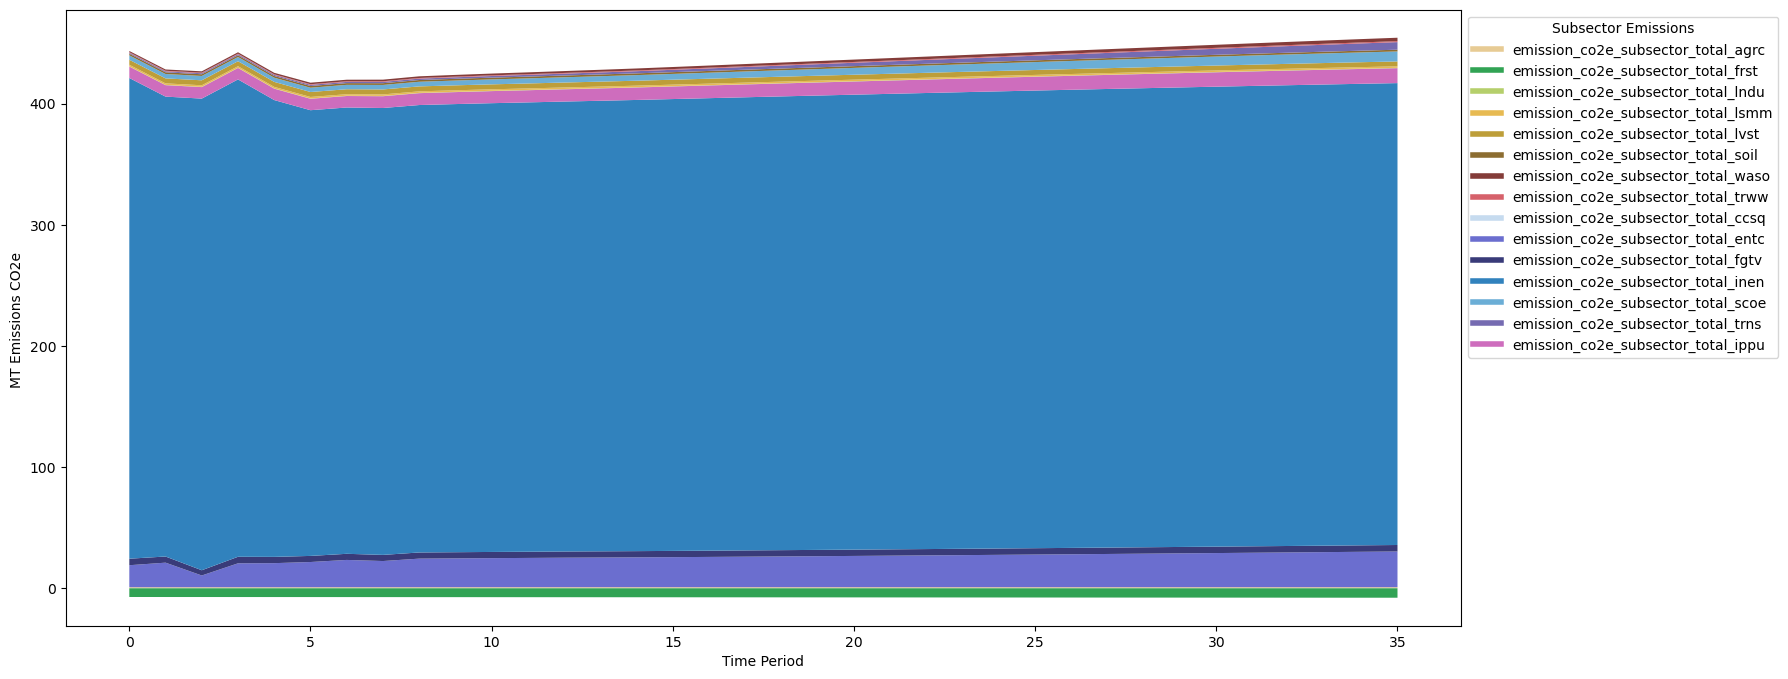

In [50]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

fields = matt.get_all_subsector_emission_total_fields()
dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x="time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


In [51]:
strategys = df_out.primary_id.unique()
strategys

array([    0, 69069, 70070, 71071, 72072])

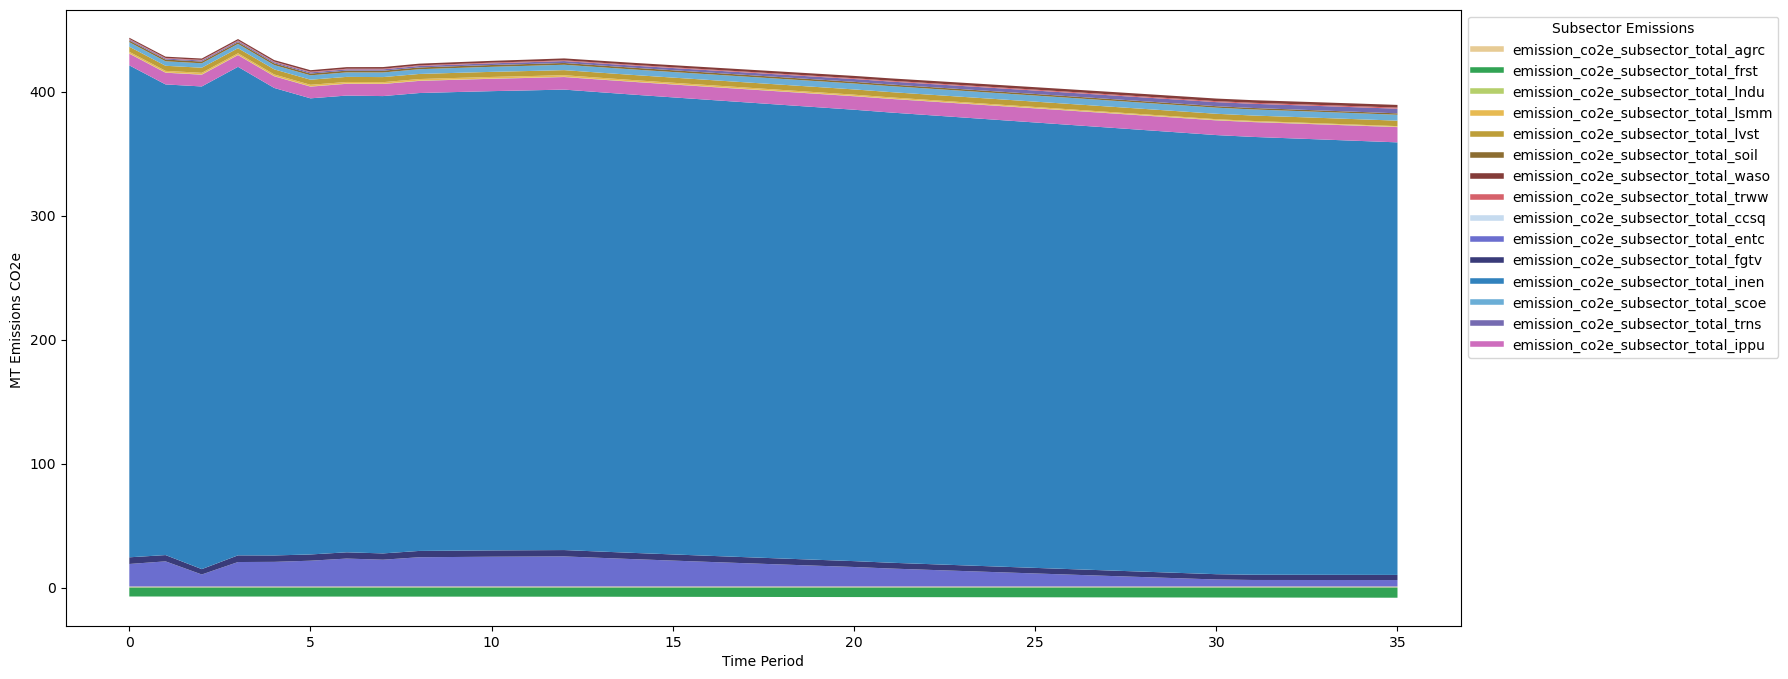

In [52]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Time Period")
ax.set_ylabel("MT Emissions CO2e ")

df_plot = df_out[df_out[ssp.key_primary].isin([69069])]

fields = matt.get_all_subsector_emission_total_fields()
dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())

fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x="time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


In [53]:
strategys = df_out.primary_id.unique()
strategys

array([    0, 69069, 70070, 71071, 72072])

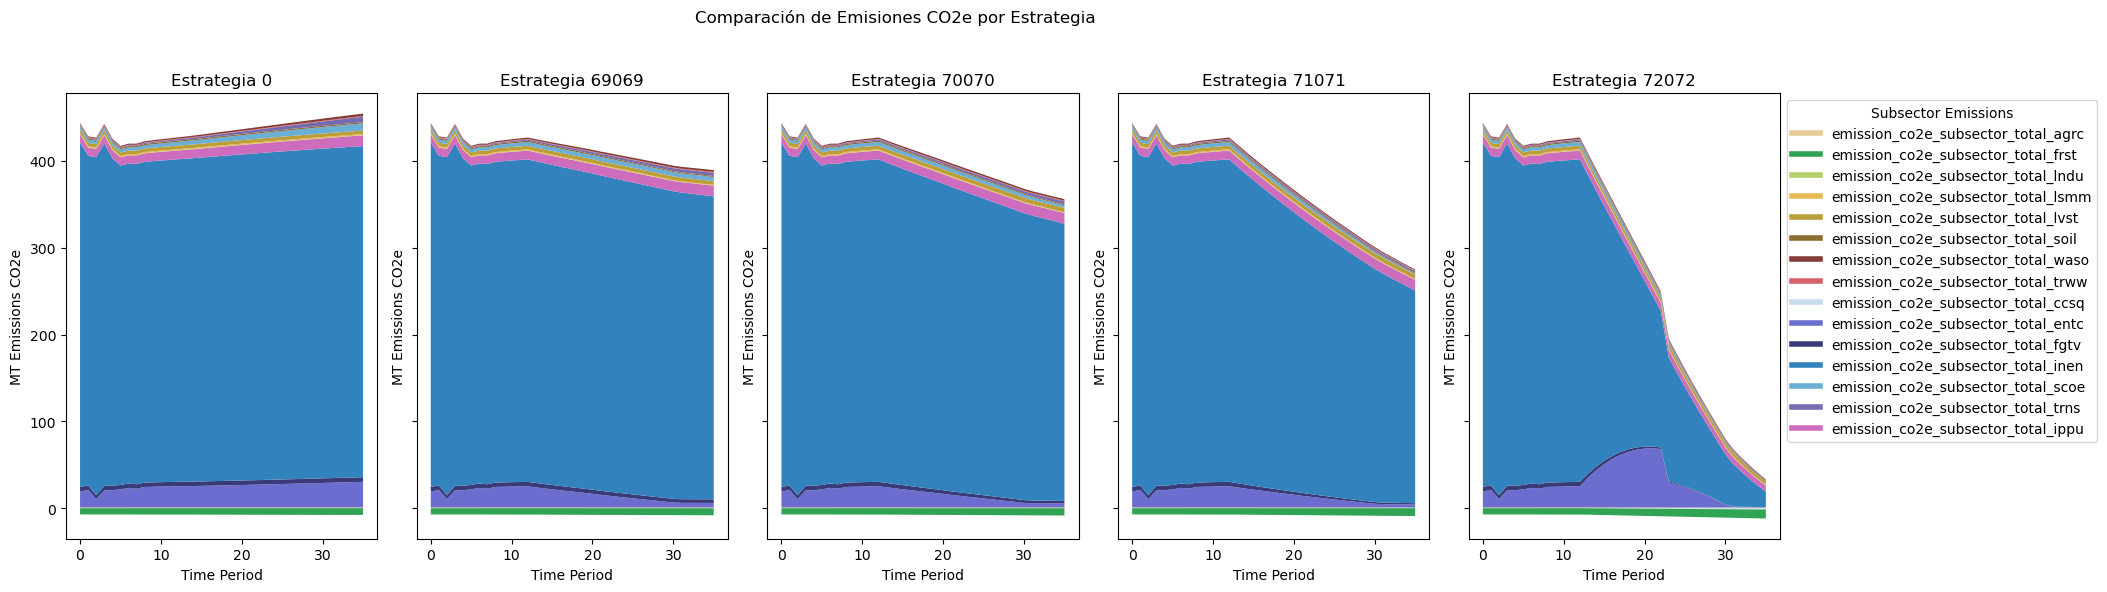

In [54]:
# Configuración del gráfico con tres subplots (uno para cada estrategia)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6), sharey=True)
fig.suptitle("Comparación de Emisiones CO2e por Estrategia")

# Iterar sobre cada estrategia y su respectivo eje
for ax, strategy in zip(axes, strategys):
    # Filtrar el DataFrame para la estrategia actual
    df_plot = df_out[df_out[ssp.key_primary].isin([strategy])]
    
    # Obtener los campos y el formato de color para cada subsector
    fields = matt.get_all_subsector_emission_total_fields()
    dict_format = dict((k, {"color": v}) for (k, v) in matt.get_subsector_color_map().items())
    
    # Graficar con el stackplot para la estrategia actual en su propio eje
    spu.plot_stack(
        df_plot,
        fields,
        dict_formatting=dict_format,
        field_x="time_period",
        figtuple=(fig, ax),
    )
    
    # Configurar etiquetas y título del subplot
    ax.set_title(f"Estrategia {strategy}")
    ax.set_xlabel("Time Period")
    ax.set_ylabel("MT Emissions CO2e")

# Mostrar el gráfico completo
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta para que el título principal no se superponga

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Subsector Emissions", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()



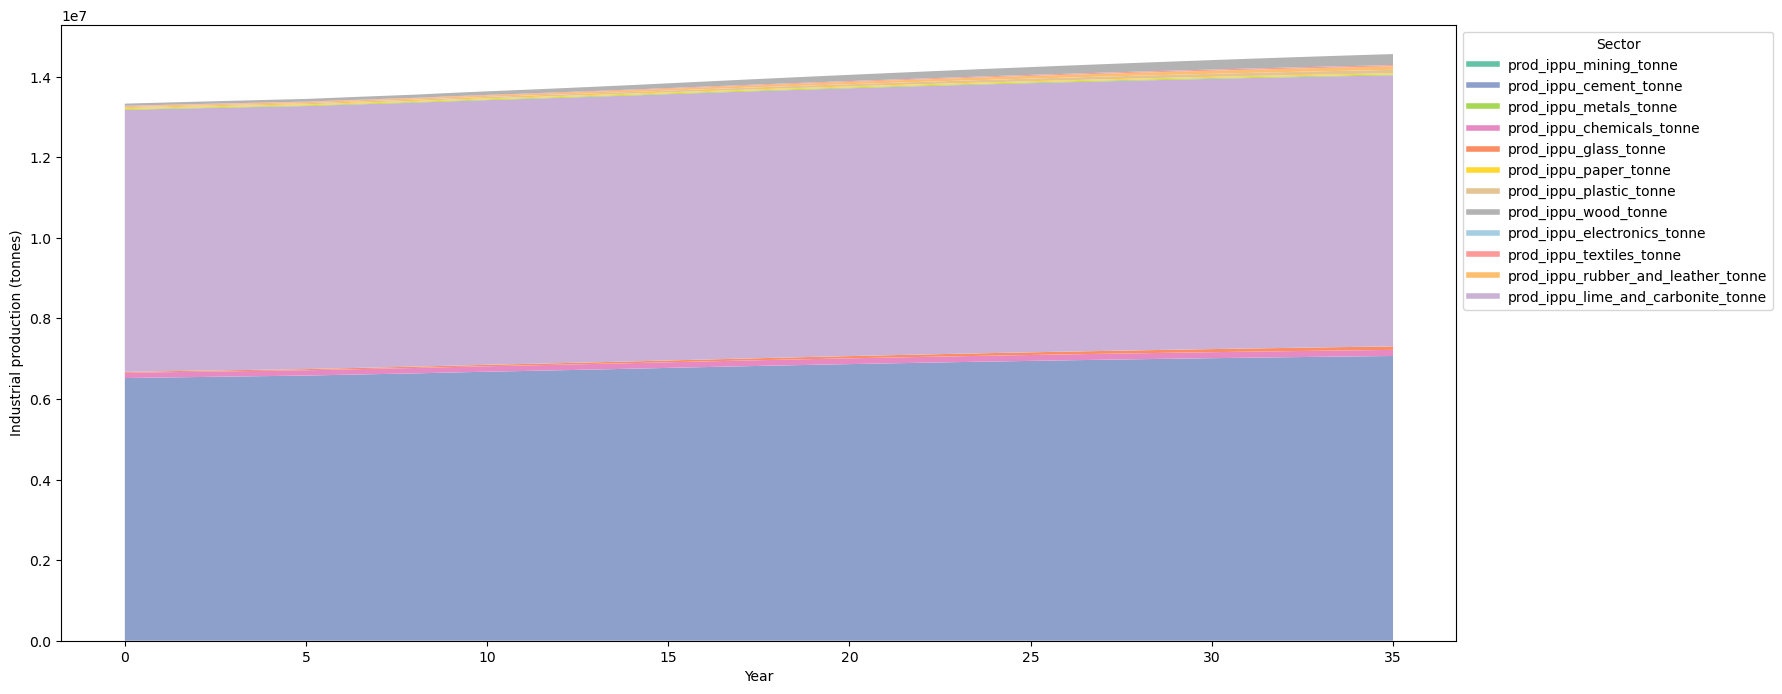

In [55]:
# Configuración del gráfico
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xlabel("Year")
ax.set_ylabel("Industrial production (tonnes)")

fields = [
    'prod_ippu_cement_tonne',
    'prod_ippu_chemicals_tonne',
    'prod_ippu_electronics_tonne',
    'prod_ippu_glass_tonne',
    'prod_ippu_lime_and_carbonite_tonne',
    'prod_ippu_metals_tonne',
    'prod_ippu_mining_tonne',
    'prod_ippu_paper_tonne',
    'prod_ippu_plastic_tonne',
    'prod_ippu_rubber_and_leather_tonne',
    'prod_ippu_textiles_tonne',
    'prod_ippu_wood_tonne'
]

# Definir colores para cada variable
color_map = {
    'prod_ippu_mining_tonne': '#66c2a5',
    'prod_ippu_cement_tonne': '#8da0cb',
    'prod_ippu_metals_tonne': '#a6d854',
    'prod_ippu_chemicals_tonne': '#e78ac3',
    'prod_ippu_glass_tonne': '#fc8d62',
    'prod_ippu_paper_tonne': '#ffd92f',
    'prod_ippu_plastic_tonne': '#e5c494',
    'prod_ippu_wood_tonne': '#b3b3b3',
    'prod_ippu_electronics_tonne': '#a6cee3',
    'prod_ippu_textiles_tonne': '#fb9a99',
    'prod_ippu_rubber_and_leather_tonne': '#fdbf6f',
    'prod_ippu_lime_and_carbonite_tonne': '#cab2d6'
}

dict_format = dict((k, {"color": v}) for (k, v) in color_map.items())


# Filtrando el DataFrame como en tu código original
# Si necesitas modificar el filtro, ajusta esta línea:
df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Obtener los campos de producción industrial
# Reemplaza esto con la lista de tus variables industriales

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())

ax.legend(handles, labels, title="Sector", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

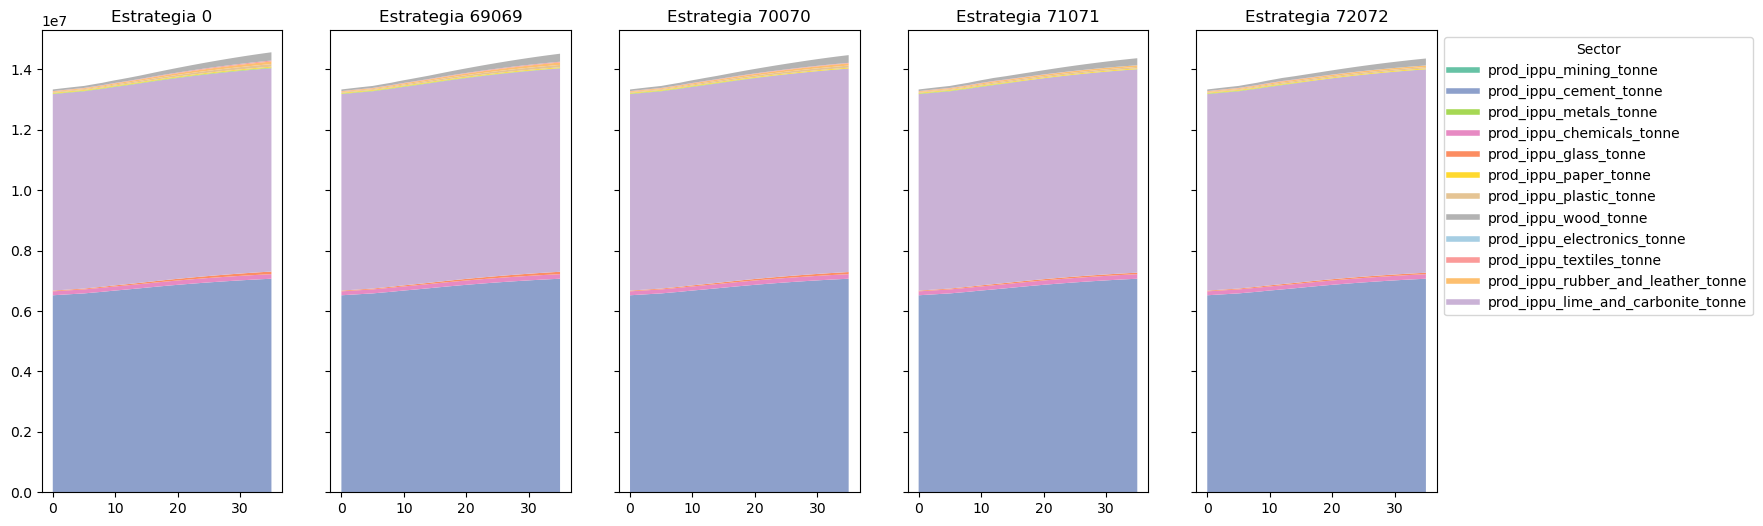

In [56]:
# Configuración del gráfico con tres subplots (uno para cada estrategia)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6), sharey=True)


# Iterar sobre cada estrategia y su respectivo eje
for ax, strategy in zip(axes, strategys):
    # Filtrar el DataFrame para la estrategia actual
    df_plot = df_out[df_out[ssp.key_primary].isin([strategy])]
    
    # Obtener los campos y el formato de color para cada subsector
    dict_format = dict((k, {"color": v}) for (k, v) in color_map.items())
    
   # Crear la gráfica de área apilada
    fig, ax = spu.plot_stack(
    df_plot,
    fields,
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),)
    ax.set_title(f"Estrategia {strategy}")

handles = [plt.Line2D([0], [0], color=formatting["color"], lw=4) for formatting in dict_format.values()]
labels = list(dict_format.keys())
ax.legend(handles, labels, title="Sector", loc="upper left", bbox_to_anchor=(1, 1))

In [57]:
df_out[[i for i in df_out.columns if "qty_waso_recycled" in i]].iloc[0]

qty_waso_recycled_glass_tonne              5068.734026
qty_waso_recycled_metal_tonne              8447.890043
qty_waso_recycled_paper_tonne             57445.652294
qty_waso_recycled_plastic_tonne            5068.734026
qty_waso_recycled_rubber_leather_tonne     4503.914481
qty_waso_recycled_textiles_tonne           5406.649628
qty_waso_recycled_wood_tonne               6118.880449
Name: 0, dtype: float64

Metals

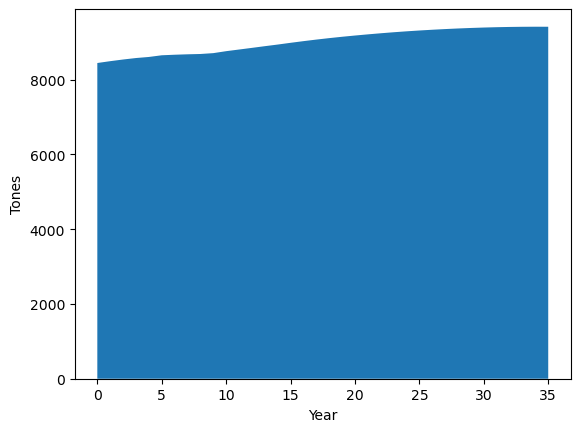

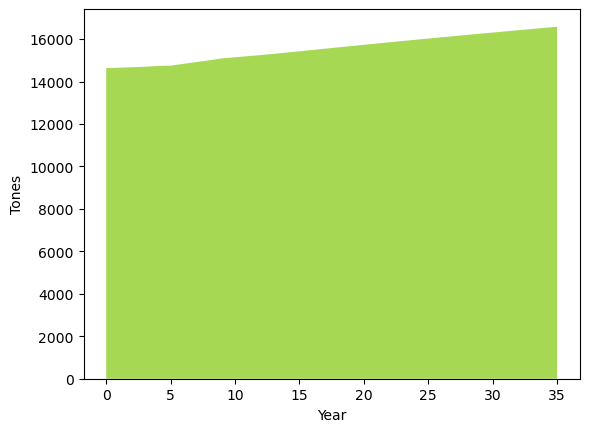

In [ ]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([72072])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_metal_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([72072])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_metals_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

Glass

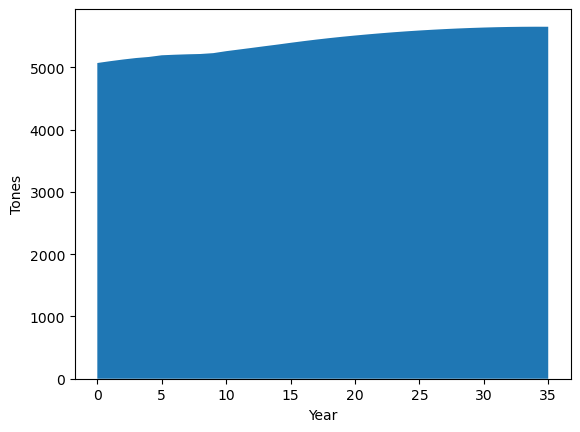

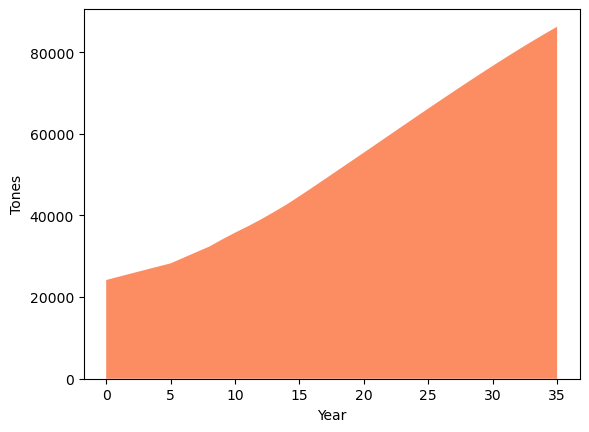

In [59]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_glass_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_glass_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

Plastic

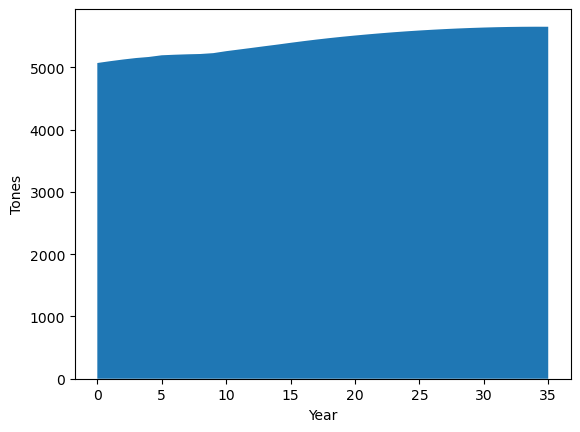

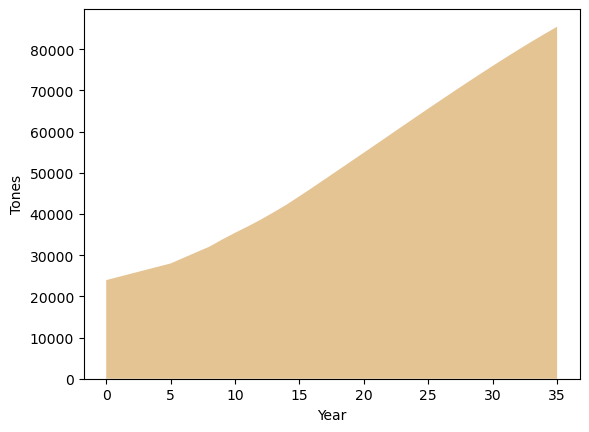

In [60]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_plastic_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_plastic_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

rubber and leather

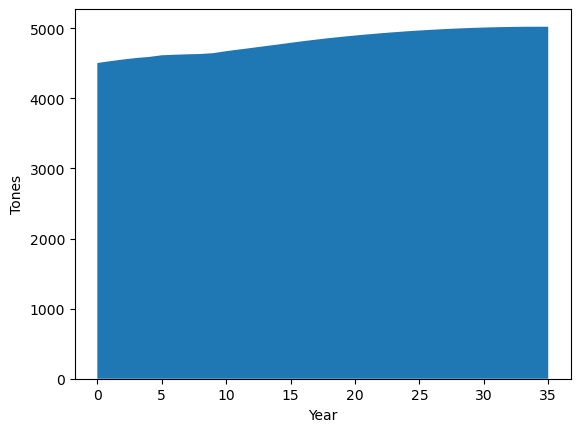

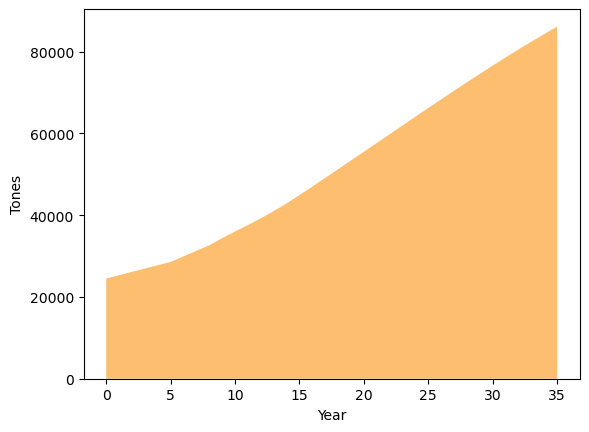

In [61]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_rubber_leather_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_rubber_and_leather_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

textiles

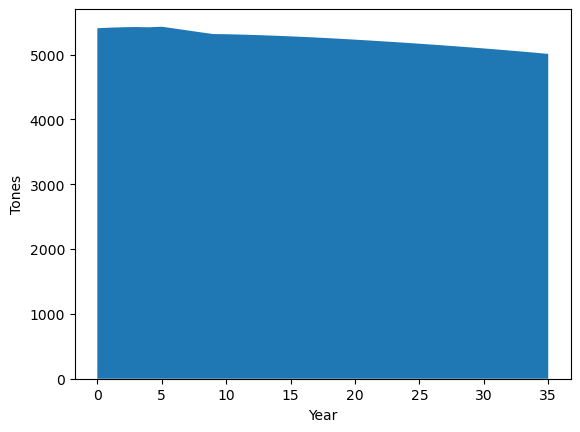

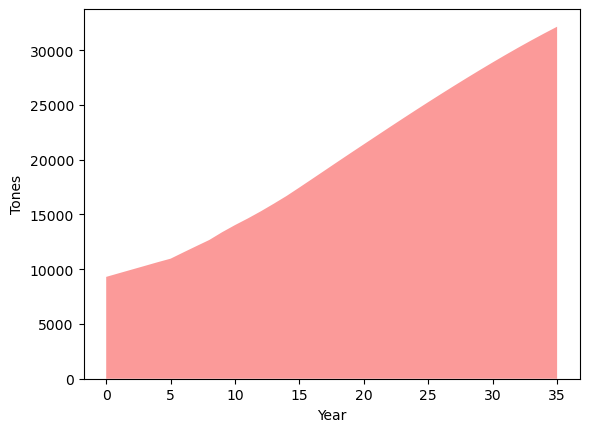

In [62]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_textiles_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_textiles_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

Wood

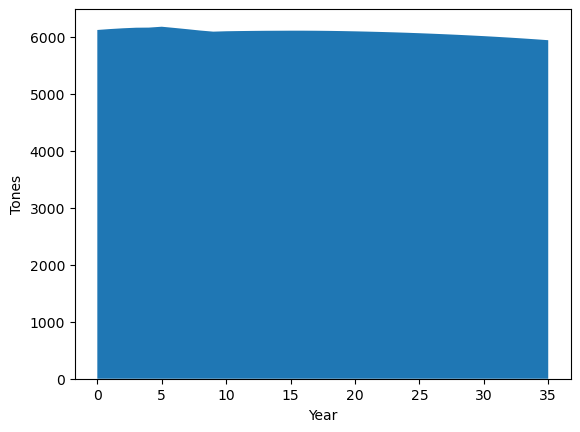

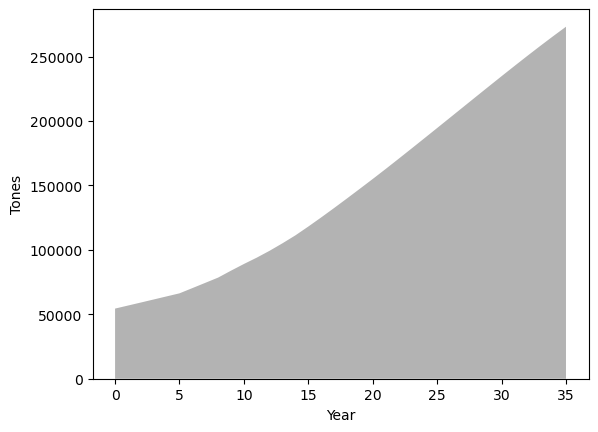

In [63]:
# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'qty_waso_recycled_wood_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

# Configuración del gráfico
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Tones")

df_plot = df_out[df_out[ssp.key_primary].isin([0])]

# Crear la gráfica de área apilada
fig, ax = spu.plot_stack(
    df_plot,
    'prod_ippu_wood_tonne',
    dict_formatting=dict_format,
    field_x= "time_period",
    figtuple=(fig, ax),
)

In [ ]:
years = df_out['time_period']  + 2015
df_out.insert(3, 'years', years)

In [65]:
# wood
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_wood_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_wood_tonne']
t_2020 = t_2020.item()

t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_wood_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_wood_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

3.8529870975502485

In [66]:
# textiles
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_textiles_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_textiles_tonne']
t_2020 = t_2020.item()

t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_textiles_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_textiles_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

2.266644459675669

In [67]:
# rubber and leather
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_rubber_and_leather_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_rubber_leather_tonne']
t_2020 = t_2020.item()

t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_rubber_and_leather_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_rubber_leather_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

2.7465839998200194

In [68]:
# plastic
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_plastic_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_plastic_tonne']
t_2020 = t_2020.item()

t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_plastic_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_plastic_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

2.74658399982002

In [69]:
# glass
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_glass_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_glass_tonne']
t_2020 = t_2020.item()
t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_glass_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_glass_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

2.7465839998200194

In [70]:
# metals
t_2020 = df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'prod_ippu_metals_tonne'] + df_out.loc[(df_out['years'] == 2020) & (df_out['primary_id'] == 0), 'qty_waso_recycled_metal_tonne']
t_2020 = t_2020.item()
t_2050 = df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'prod_ippu_metals_tonne'] + df_out.loc[(df_out['years'] == 2050) & (df_out['primary_id'] == 0), 'qty_waso_recycled_metal_tonne']
t_2050 = t_2050.item()

t_2050/t_2020

1.110949424906145

# Export Wide File (Last Mandatory Step)

In [71]:
df_out = ssp.read_output(None)
df_in = ssp.read_input(None)


all_primaries = sorted(list(df_out[ssp.key_primary].unique()))

# build if unable to simply read the data frame
if df_in is None:
    df_in = []
     
    for region in ssp.regions:
        for primary in all_primaries: 
            df_in_filt = ssp.generate_scenario_database_from_primary_key(primary)
            df_in.append(df_in_filt.get(region))
    
    df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)




df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)



# check output directory 
dir_pkg = os.path.join(
    ssp.file_struct.dir_out, 
    f"sisepuede_summary_results_run_{ssp.id_fs_safe}"
)
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None


for tab in ["ATTRIBUTE_STRATEGY"]:
    table_df = ssp.database.db.read_table(tab)
    if table_df is not None:
        table_df.to_csv(
            os.path.join(dir_pkg, f"{tab}.csv"),
            index=None,
            encoding="UTF-8"
        )
    else:
        print(f"Warning: Table {tab} returned None.")


df_primary = (
    ssp
    .odpt_primary
    .get_indexing_dataframe(
        sorted(list(df_out[ssp.key_primary].unique()))
    )
)
    
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{ssp.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

In [72]:
# Getting the directory where the outputs are stored
ssp.file_struct.dir_out

'/home/fabian_fuentes/anaconda3/envs/ssp/lib/python3.11/site-packages/sisepuede/out'